In [1]:
import re

import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.util import ngrams
from collections import Counter

# Ensure necessary resources are downloaded
nltk.download('stopwords')
nltk.download('punkt')


with open("Lab2_Parsing.txt","r", encoding="cp1252") as f:
    text = f.read()


def extract_error_code(text):
    http_error_match = re.search(r"<HttpError (\d+)", text)
    if http_error_match:
        return f"HTTP Error Code: {http_error_match.group(1)}"

    charmap_range_match = re.search(r"'charmap' codec can't encode characters.*?(\d+)-(\d+)", text)
    if charmap_range_match:
        return f"Charmap Error Positions: {charmap_range_match.group(1)}-{charmap_range_match.group(2)}"
    
    charmap_unicode_match = re.search(r"'charmap' codec can't encode character '(.+)' in position (\d+)", text)
    if charmap_unicode_match:
        return f"Charmap Error Character: {charmap_unicode_match.group(1)}, Position: {charmap_unicode_match.group(2)}"
    
    
    return "No error code found"



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sthaa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sthaa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
pattern = re.compile(r"NewMovieDrPQRd\s*(.*?)\s*NewMovieDrPQRd", re.DOTALL)

matches = pattern.findall(text)

errored = []
sucess = []
for j, match in enumerate(matches, 1):
    chunk = match.strip()
    chunk_split = chunk.split("\n")
    if chunk_split[0] == chunk_split[1]:
        data = {}
        data["ID"] = chunk_split[0]
        data["error"] = extract_error_code(chunk_split[-1])
        
        errored.append(data)
    else:
        sucess.append(chunk)


Text(0.5, 1.0, 'Sucess and faliure count for movie feedback')

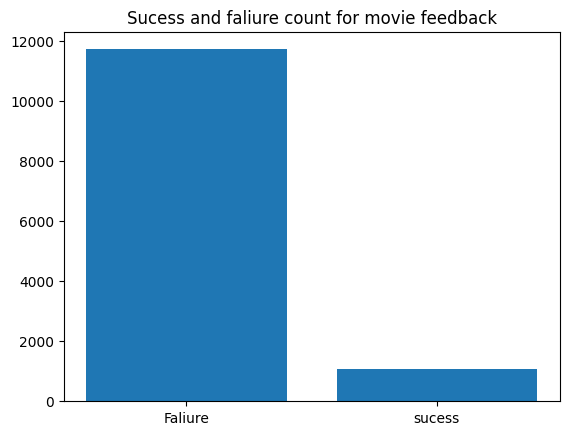

In [3]:
import matplotlib.pyplot as plt 

plt.bar(x=["Faliure","sucess"],height=[len(errored),len(sucess)])
plt.title("Sucess and faliure count for movie feedback")

In [4]:


def process_text(text):
    words = nltk.word_tokenize(text.lower())

    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word.isalnum() and word not in stop_words]

    bigrams = list(ngrams(filtered_words, 2))
    trigrams = list(ngrams(filtered_words, 3))

    bigram_freq = Counter(bigrams)
    trigram_freq = Counter(trigrams)

    return stop_words, bigram_freq, trigram_freq

def plot_ngram_frequencies(ngram_freq, title):
    common_ngrams = ngram_freq.most_common(10)

    ngrams, counts = zip(*common_ngrams)

    ngram_labels = [' '.join(ngram) for ngram in ngrams]

    plt.figure(figsize=(10, 5))
    plt.barh(ngram_labels, counts, color='skyblue')
    plt.xlabel('Frequency')
    plt.ylabel('N-grams')
    plt.title(title)
    plt.gca().invert_yaxis()  
    plt.show()


text = "\n".join(sucess)
stop_words, bigram_freq, trigram_freq = process_text(text)

In [5]:
print("Stop words used in filtering:", stop_words)
print("\nMost common bigrams:", bigram_freq.most_common(10))
print("\nMost common trigrams:", trigram_freq.most_common(10))

Stop words used in filtering: {'few', 'such', 'doesn', 'd', "haven't", 'they', 'any', "weren't", "didn't", 'll', 'has', 'ours', 'no', 'at', 'own', 'won', 'we', 'him', 'with', 'here', 'once', 'y', 'was', 'did', 'himself', 'hadn', "shan't", 'just', 'i', 'can', 'very', 'shouldn', 'as', 'its', 'before', 'to', "mightn't", 'whom', 'only', "she's", 'themselves', 'wasn', 'didn', 'ain', 'yourself', 'most', 'under', 'theirs', 'up', 'isn', 'this', 'our', 'off', 'doing', 'your', 'it', 't', 'her', 'more', 'be', 'how', "couldn't", 'too', 've', 'shan', 'will', 'itself', 'do', 'because', 'should', 'yours', 'each', 'after', 'hasn', 'when', 'both', 'some', 'and', 'you', 'what', 'these', 'weren', 'an', 'where', 'by', 'now', "won't", 'his', 'don', 'couldn', 'in', 'me', 'mustn', 'needn', "needn't", 'all', 'aren', 'from', 'ma', 'yourselves', 'their', 'have', 's', "that'll", "mustn't", 'the', 'ourselves', 'which', 'hers', 'not', 'having', "you've", 'during', 'or', 'them', 'same', "you'll", 'who', 'than', 'ov

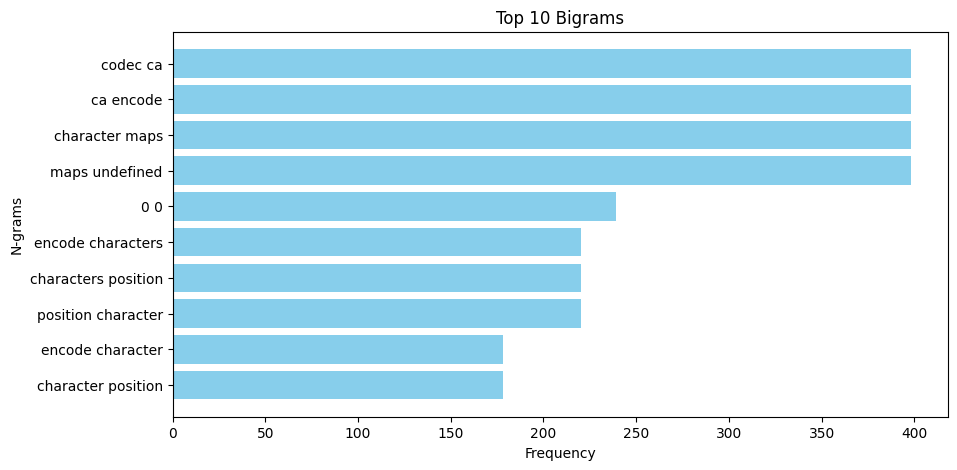

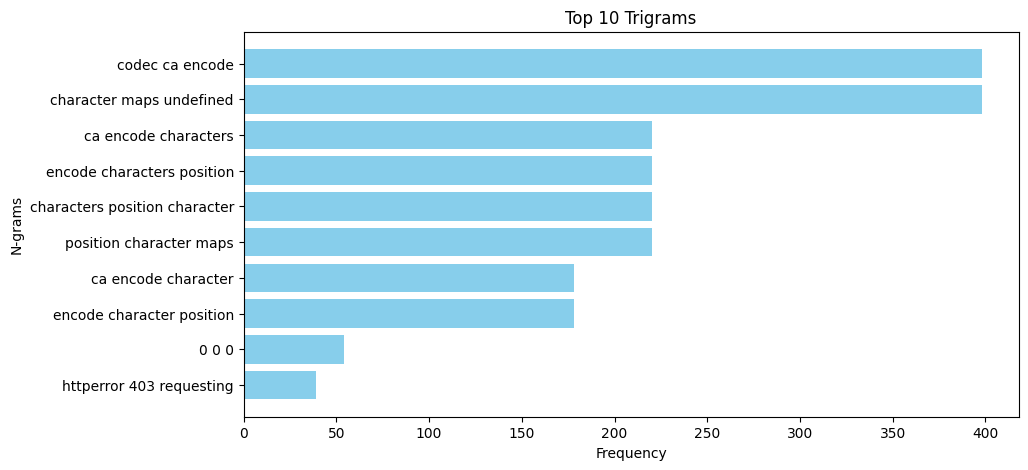

In [6]:
plot_ngram_frequencies(bigram_freq, "Top 10 Bigrams")
plot_ngram_frequencies(trigram_freq, "Top 10 Trigrams")